In [47]:
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [48]:
train = pd.read_csv("titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
test = pd.read_csv("titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
def impute_age(cols):
    Age = cols.iloc[0] 
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):
        return train[train['Pclass']==Pclass]['Age'].mean()
    else:
        return Age

In [51]:
def replaceGender(col):
    
    if col == 'male':
        return 0
    else:
        return 1

In [52]:
train['Sex'] = train['Sex'].apply(replaceGender)

In [53]:
test['Sex'] = test['Sex'].apply(replaceGender)

In [54]:
def replaceEmbarked(col):
    
    if col == 'Q':
        return 0
    elif col == 'S':
        return 1
    else:
        return 2

In [55]:
train['Embarked'] = train['Embarked'].apply(replaceEmbarked)

In [56]:
test['Embarked'] = test['Embarked'].apply(replaceEmbarked)

In [57]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

In [58]:
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis = 1)

<Axes: >

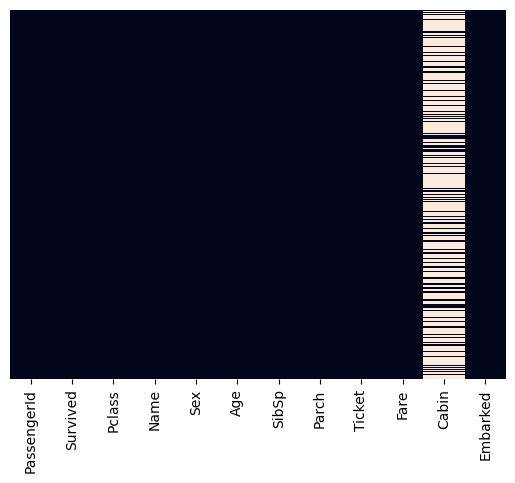

In [79]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [20]:
svcTitanic = SVC()

In [65]:
param_grid = {'C': [0.01,0.1,1,10,100,1000],
              'gamma': [0.000001,0.00001,0.0001,0.001,0.01,1,10]}

In [71]:
features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']

In [72]:
X_train = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [73]:
Y_train = train['Survived']

In [74]:
svcTitanic.fit(X_train, Y_train)

SVC()

In [75]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3, refit = True)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ...............C=0.01, gamma=1e-06;, score=0.615 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=1e-06;, score=0.618 total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=1e-06;, score=0.618 total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=1e-06;, score=0.618 total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=1e-06;, score=0.612 total time=   0.0s
[CV 1/5] END ...............C=0.01, gamma=1e-05;, score=0.615 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=1e-05;, score=0.618 total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=1e-05;, score=0.618 total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=1e-05;, score=0.618 total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=1e-05;, score=0.612 total time=   0.0s
[CV 1/5] END ..............C=0.01, gamma=0.0001;, score=0.615 total time=   0.0s
[CV 2/5] END ..............C=0.01, gamma=0.0001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1, 10]},
             verbose=3)

In [ ]:
X_test['Cabin'] = X_test['Cabin']

<Axes: >

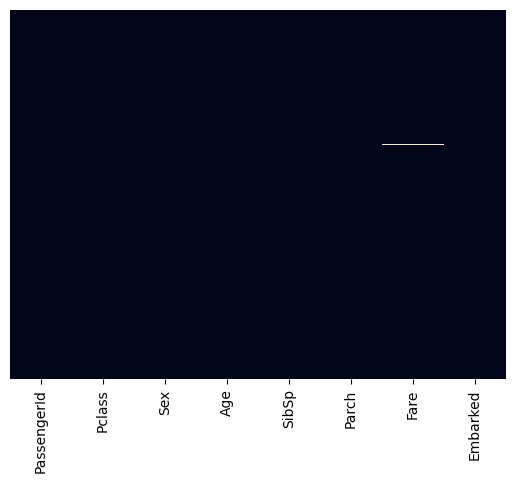

In [80]:
sns.heatmap(X_test.isnull(), yticklabels = False, cbar = False)

In [81]:
def impute_fare(cols):
    Fare = cols.iloc[0] 
    Pclass = cols.iloc[1]
    
    if pd.isnull(Fare):
        return train[train['Pclass']==Pclass]['Fare'].mean()
    else:
        return Fare

In [82]:
X_test['Fare'] = X_test[['Fare','Pclass']].apply(impute_age, axis = 1)

In [83]:
gridPredTitanic = grid.predict(X_test)

In [84]:
output2 = pd.DataFrame({"PassengerID" : test.PassengerId, 'Survived': gridPredTitanic})
output2.to_csv('submission2.csv', index = False)

## Note: The results produce by this model is way worse than using a logistic regression model.